<a href="https://colab.research.google.com/github/glYohanny/evaluacion_1_/blob/main/evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importa las librerías a nuestro entorno de trabajo

import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns#complemento de matplotlib.pyplot

dataframe

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")
df.head(10)

Saving archive (2).zip to archive (2).zip


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


en principio se realiza una divicion entre las varibles de tipo categoricas y las numericas para facilitar el analicis, ya que esto facilitara sacar las medida de tendencia central percentiles y desviacion estandar

In [3]:
# Identificar variables categóricas y numéricas
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Imprimir los tipos de variables
print("Variables Categóricas:", categorical_vars)
print("Variables Numéricas:", numerical_vars)

Variables Categóricas: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Variables Numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Iterar sobre las variables numéricas
for var in numerical_vars:
    # 1. Calcular estadísticas descriptivas
    descriptive_stats = df[var].describe()
    print(f"Estadísticas Descriptivas para {var}:\n", descriptive_stats,"\n")



Estadísticas Descriptivas para Age:
 count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64 

Estadísticas Descriptivas para DailyRate:
 count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64 

Estadísticas Descriptivas para DistanceFromHome:
 count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64 

Estadísticas Descriptivas para Education:
 count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64 

Estadísticas Descr

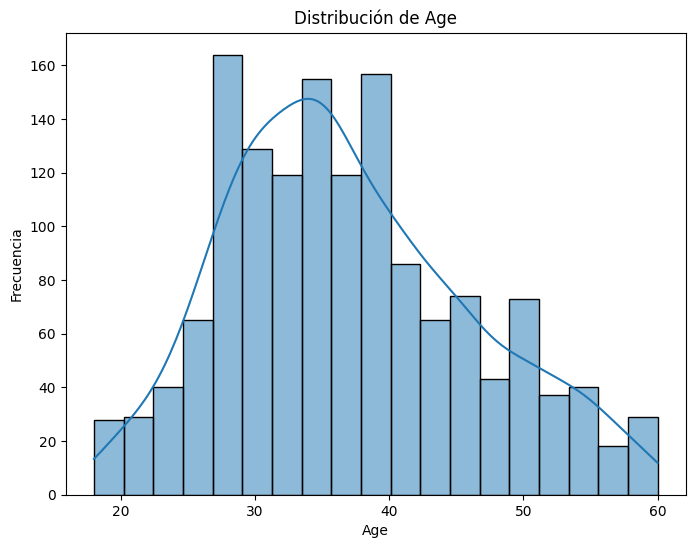

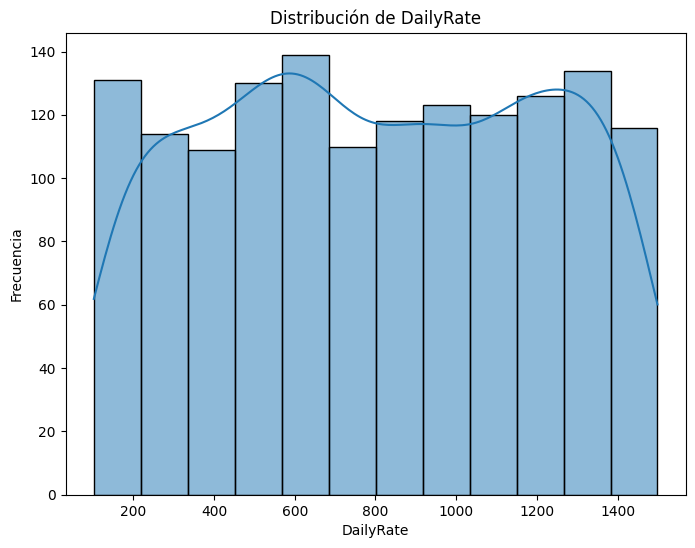

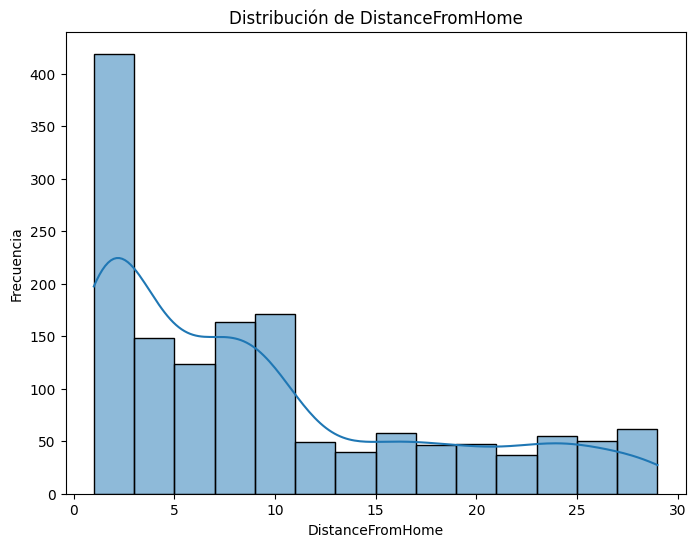

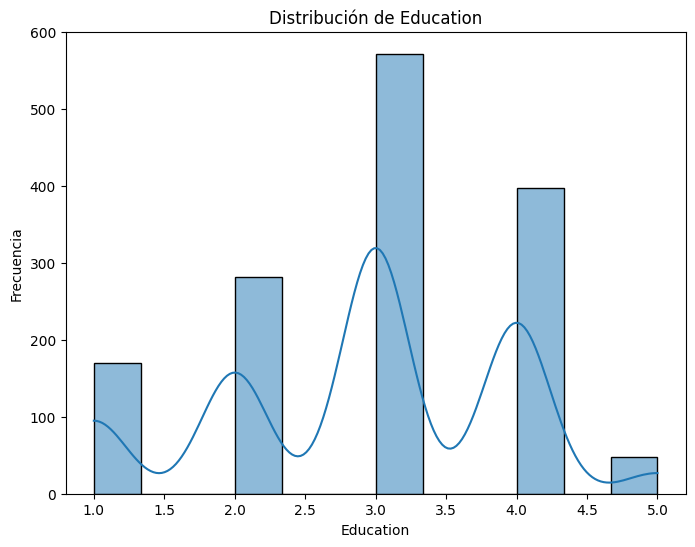

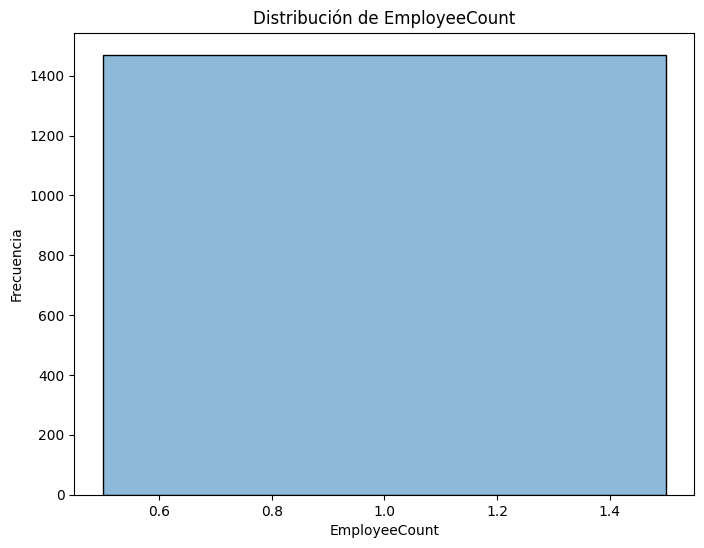

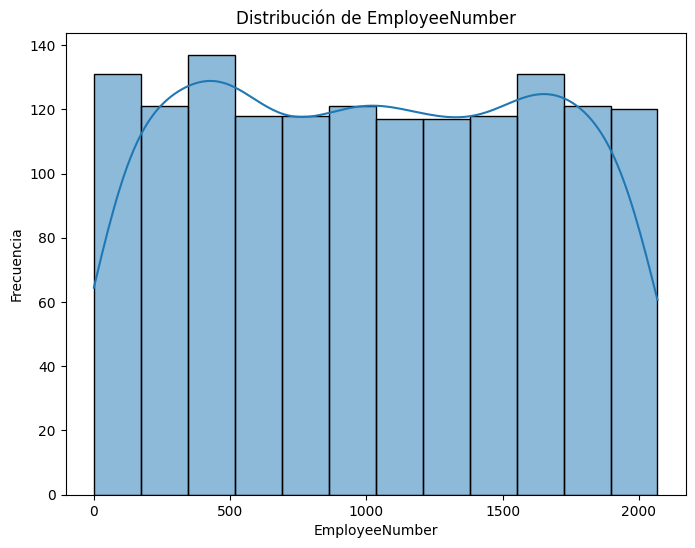

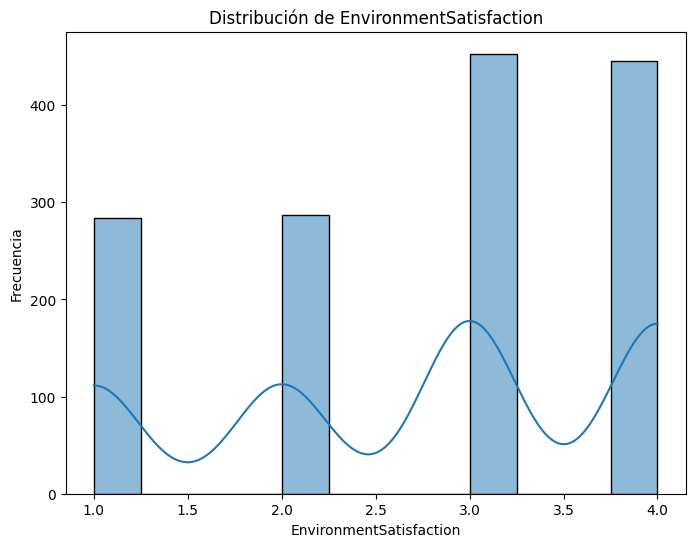

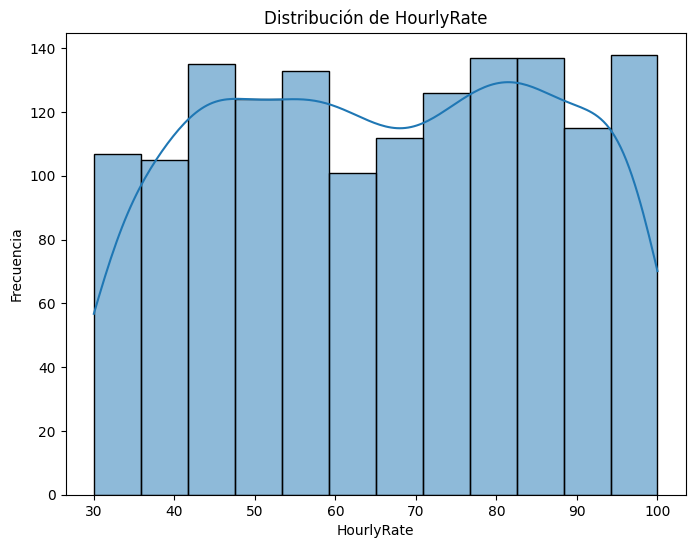

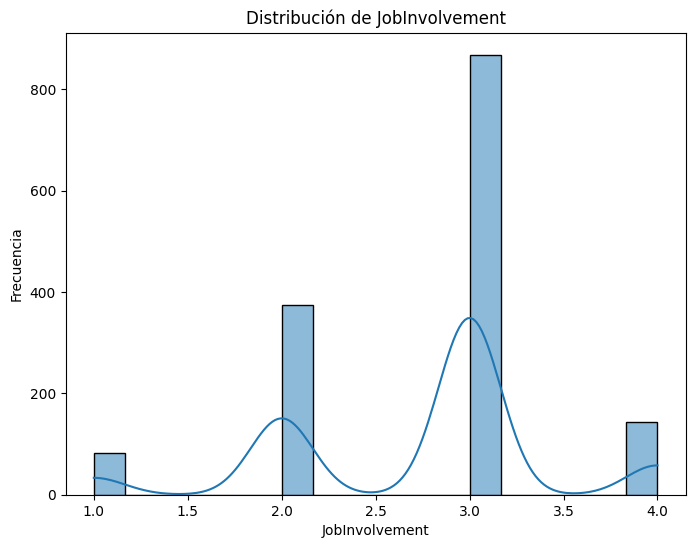

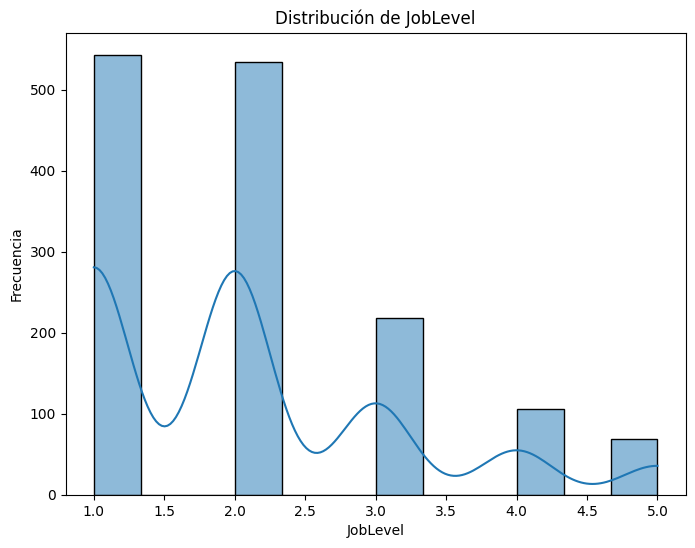

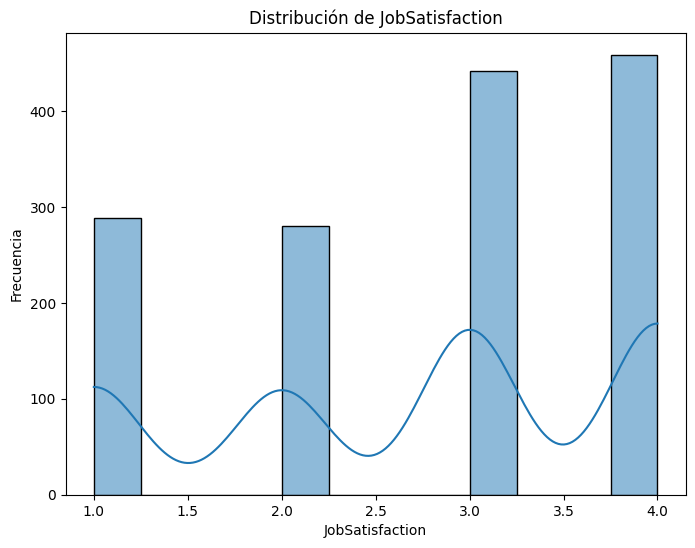

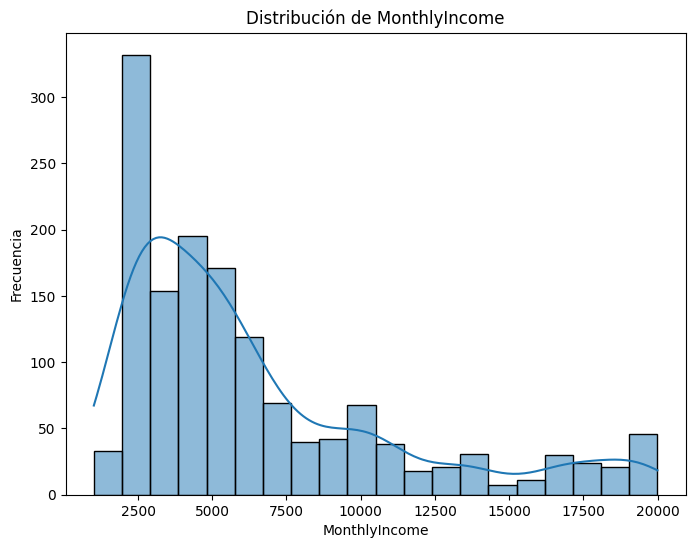

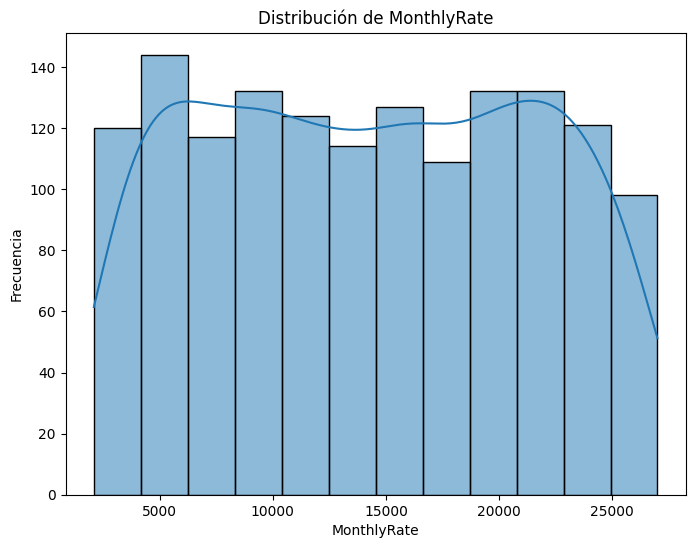

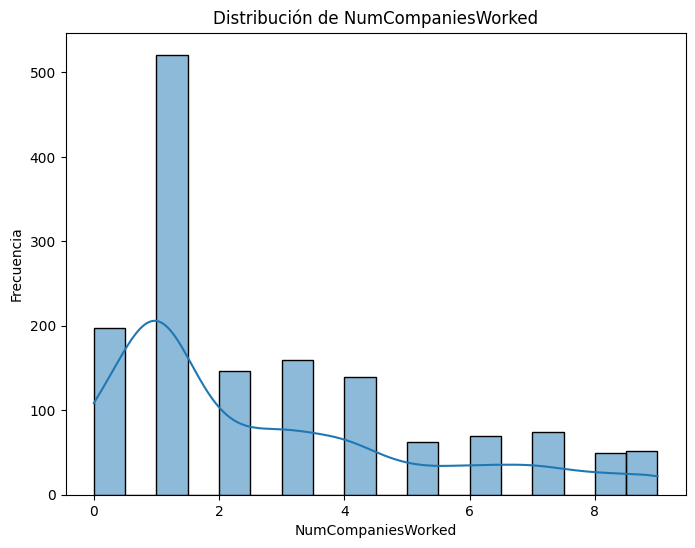

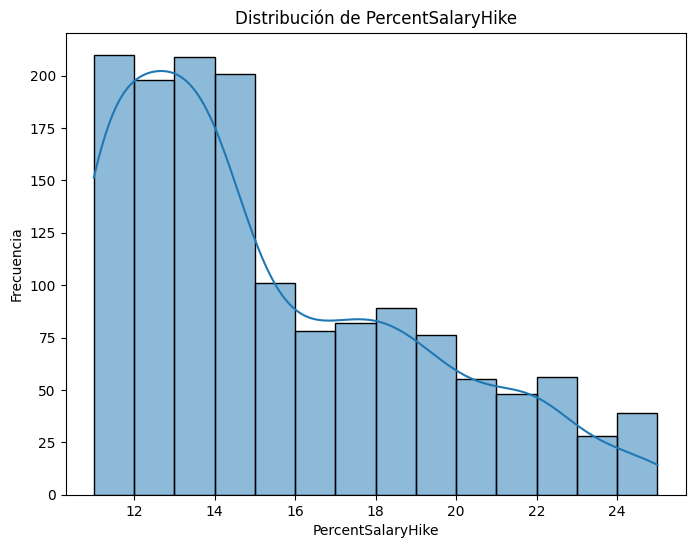

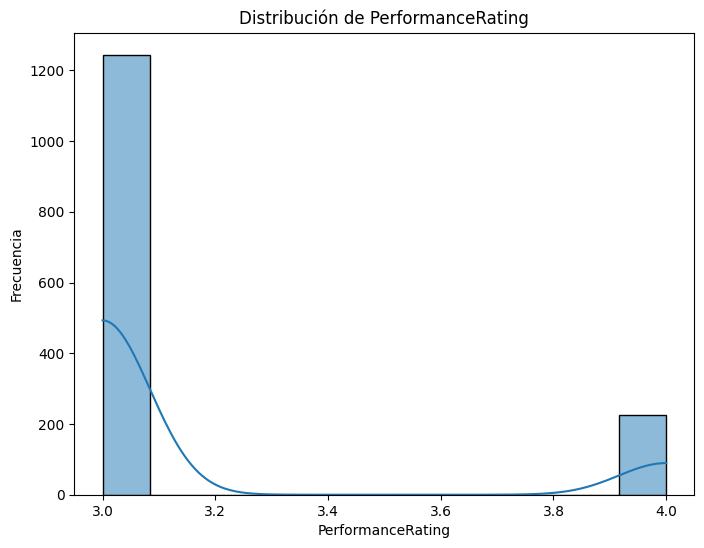

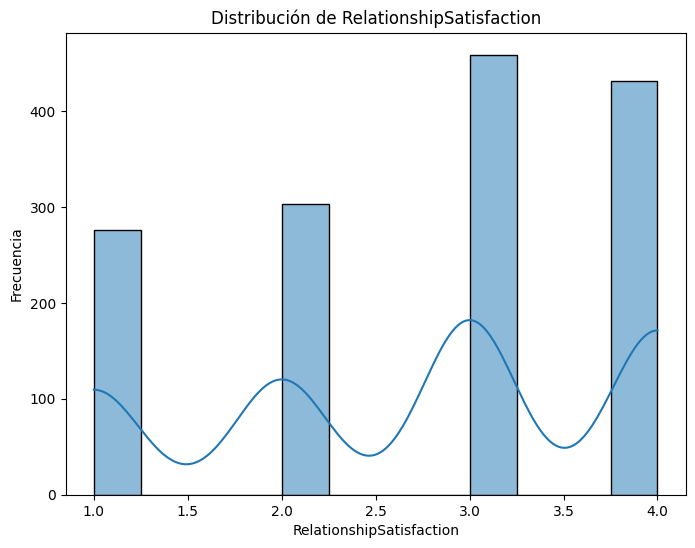

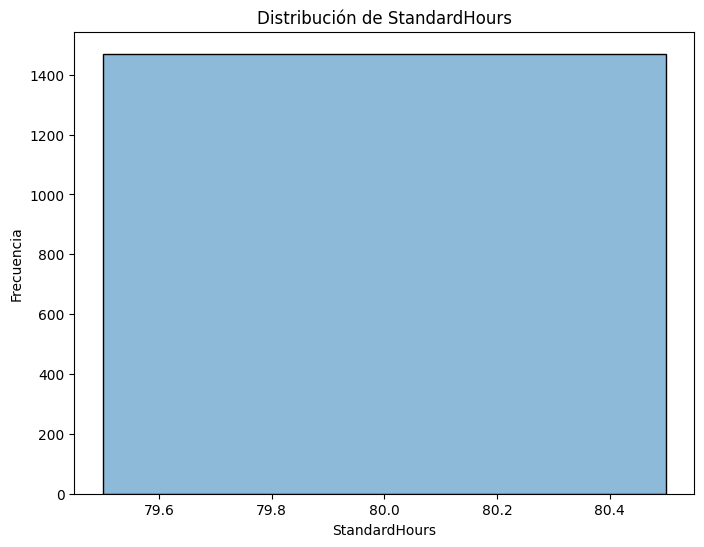

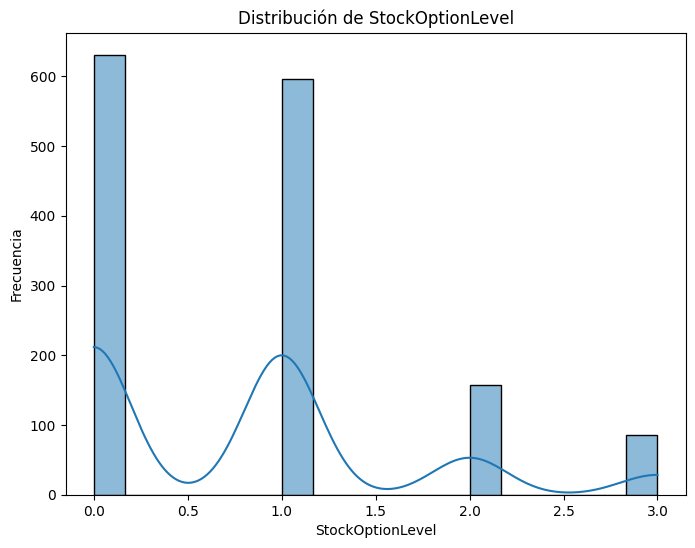

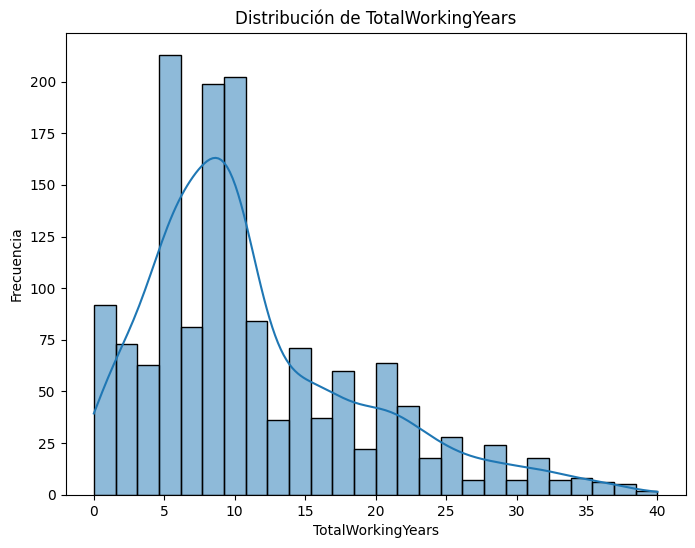

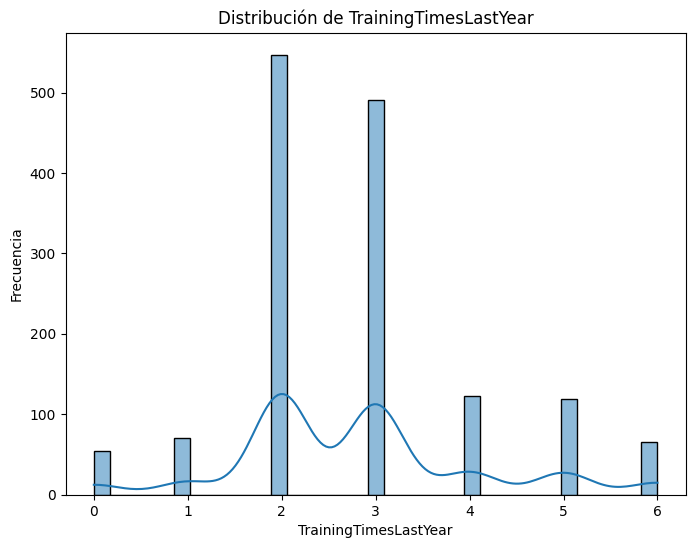

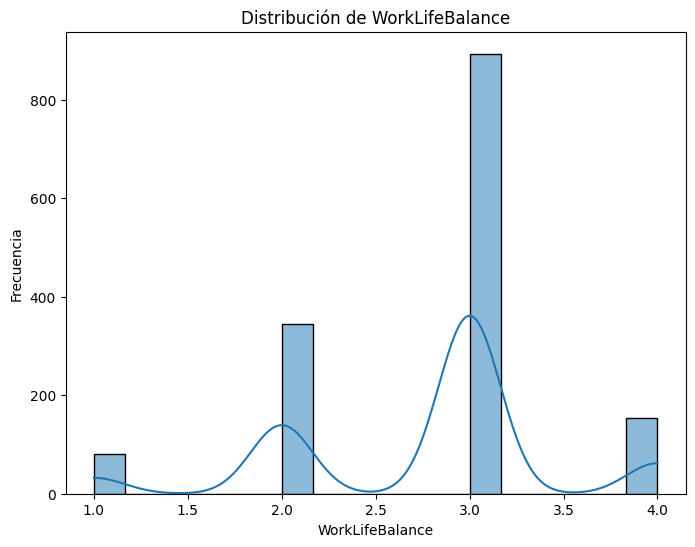

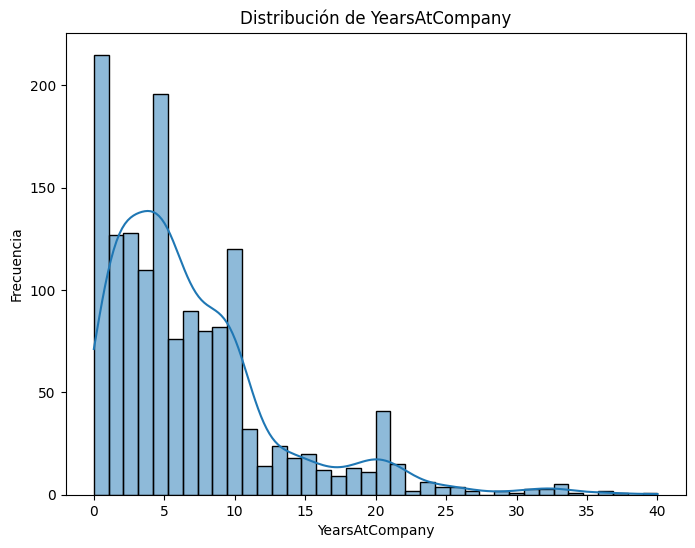

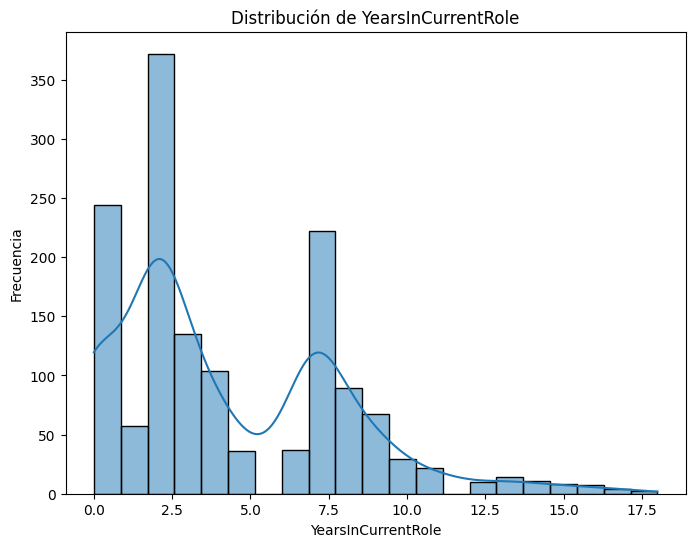

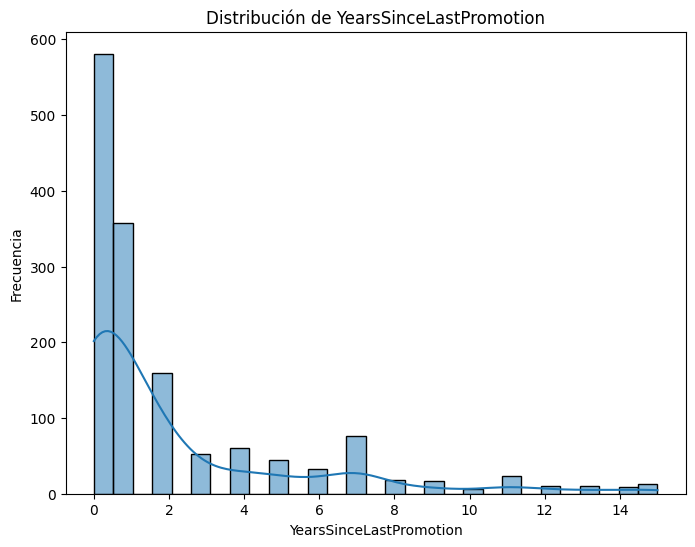

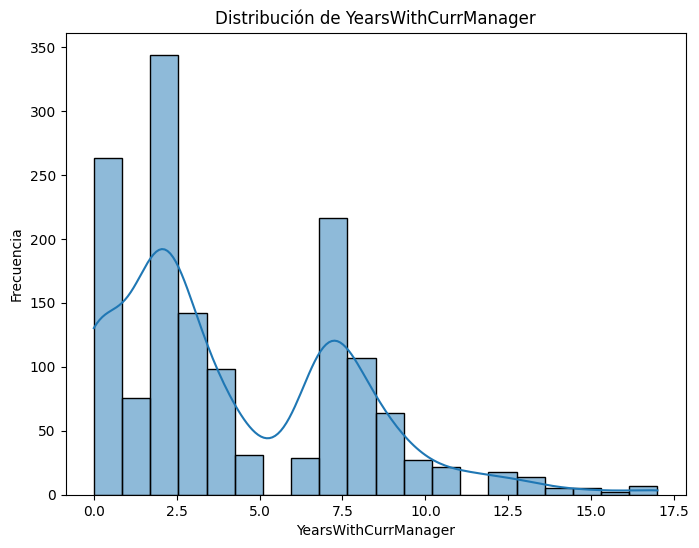

In [13]:
for var in numerical_vars:
  # 2. Crear histograma para analizar la distribución
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()
    print("\n")

In [16]:
for var in numerical_vars:
   # 3. Calcular la asimetría
    skewness = df[var].skew()
    print(f"Asimetría de {var}:", skewness)
    print("\n")

Asimetría de Age: 0.4132863018563338


Asimetría de DailyRate: -0.003518568352325854


Asimetría de DistanceFromHome: 0.9581179956568269


Asimetría de Education: -0.2896810819684331


Asimetría de EmployeeCount: 0.0


Asimetría de EmployeeNumber: 0.016574019580105036


Asimetría de EnvironmentSatisfaction: -0.32165444773937907


Asimetría de HourlyRate: -0.03231095290044942


Asimetría de JobInvolvement: -0.4984193640419493


Asimetría de JobLevel: 1.0254012829518246


Asimetría de JobSatisfaction: -0.3296719586636647


Asimetría de MonthlyIncome: 1.3698166808390662


Asimetría de MonthlyRate: 0.018577807891132458


Asimetría de NumCompaniesWorked: 1.026471111968205


Asimetría de PercentSalaryHike: 0.8211279755780908


Asimetría de PerformanceRating: 1.921882702142603


Asimetría de RelationshipSatisfaction: -0.30282756517072296


Asimetría de StandardHours: 0.0


Asimetría de StockOptionLevel: 0.9689803167738937


Asimetría de TotalWorkingYears: 1.1171718528128527


Asimetría de Tra

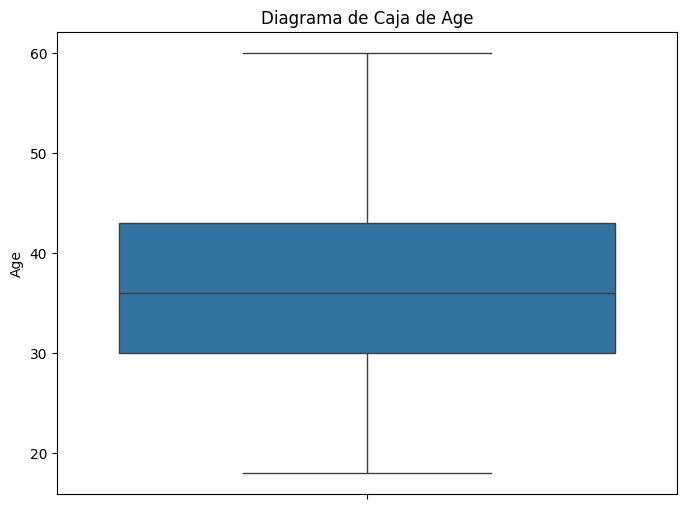

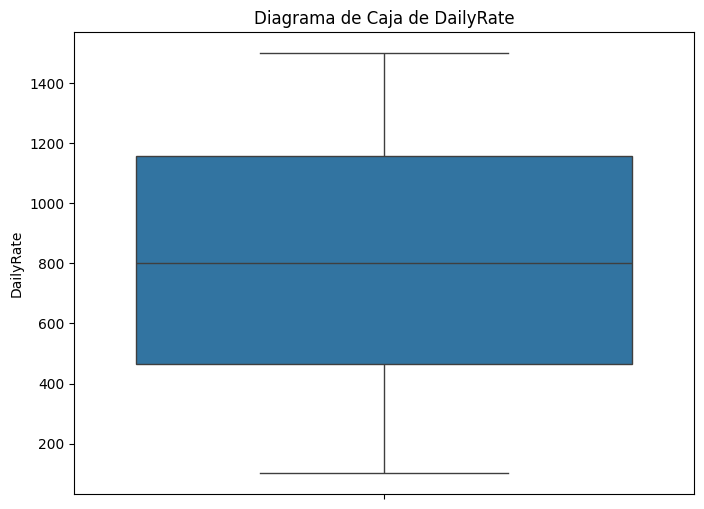

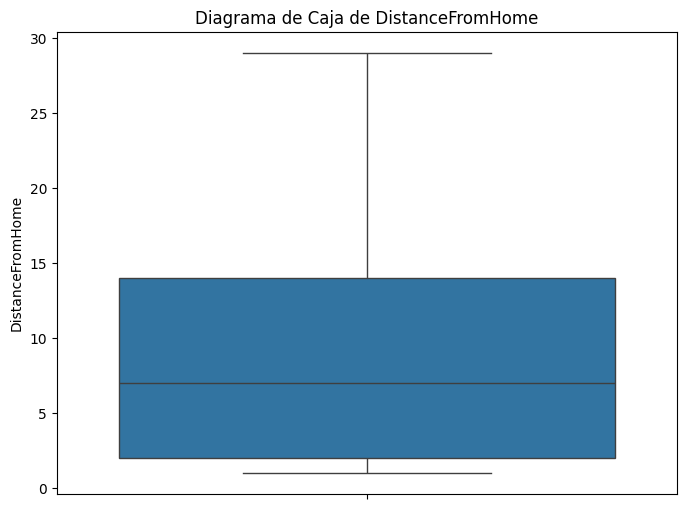

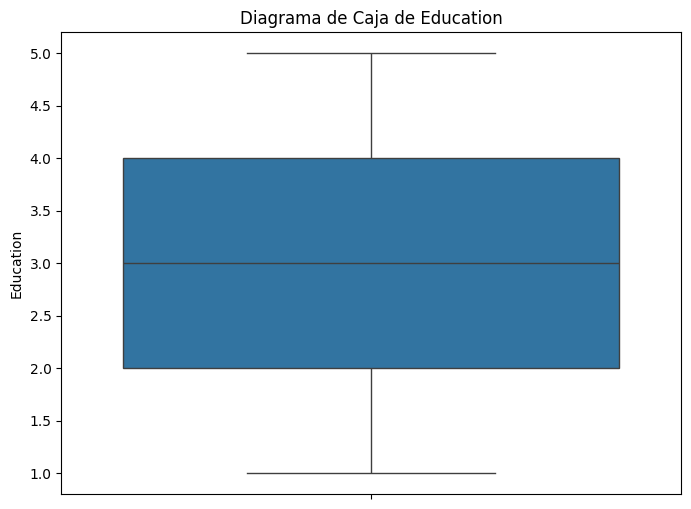

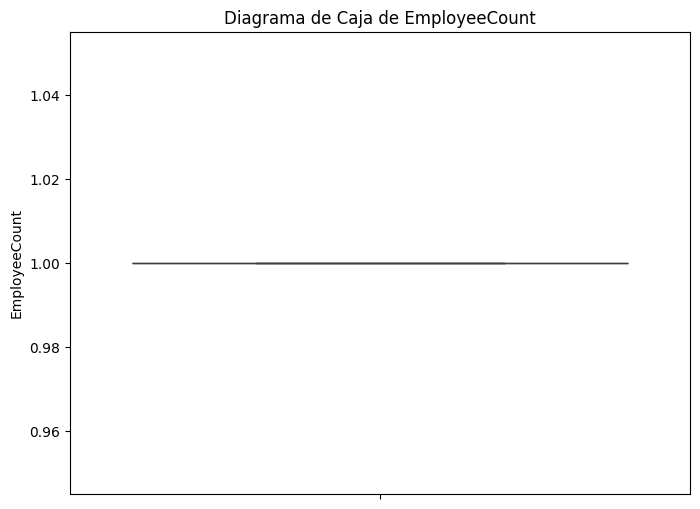

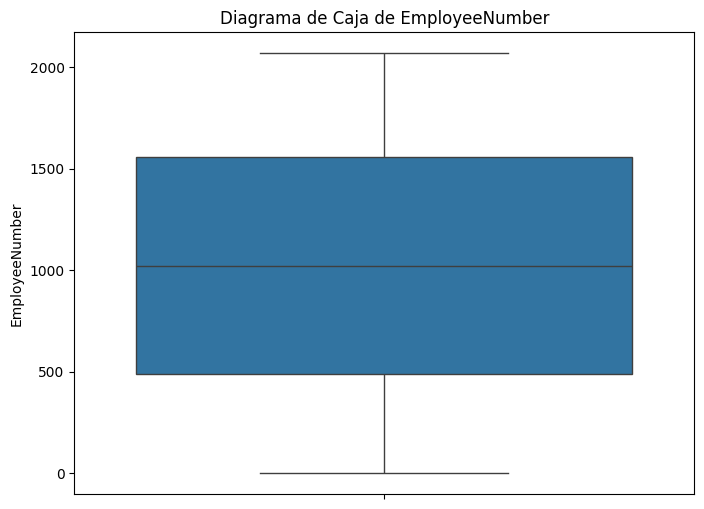

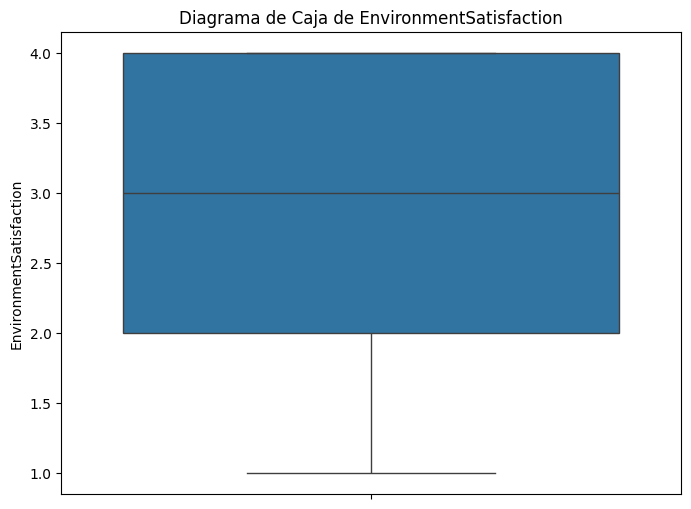

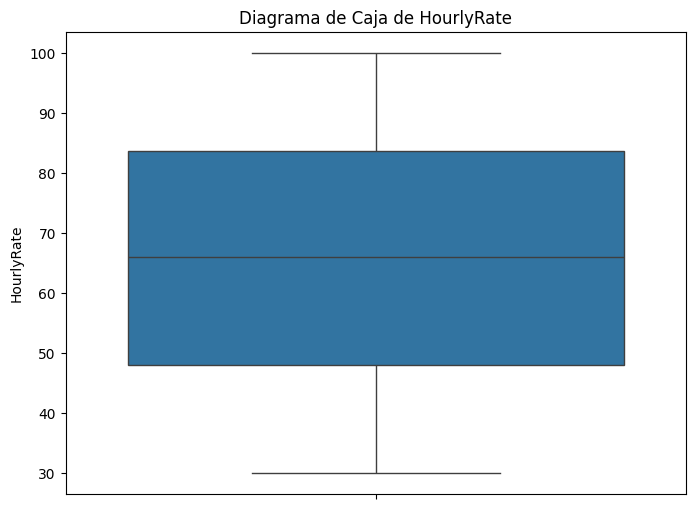

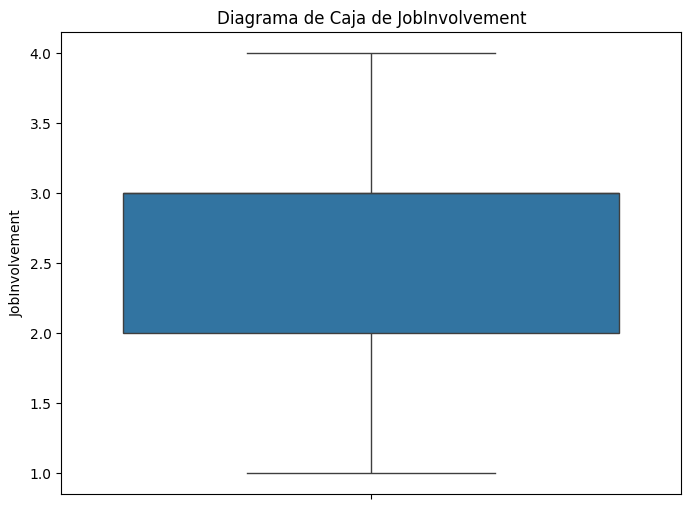

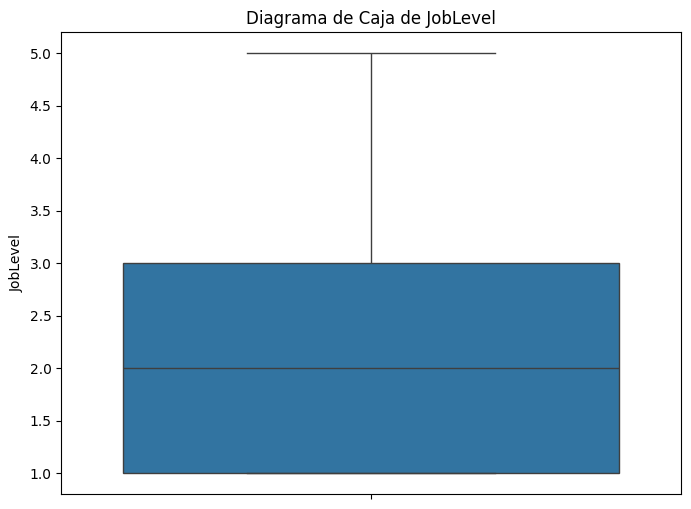

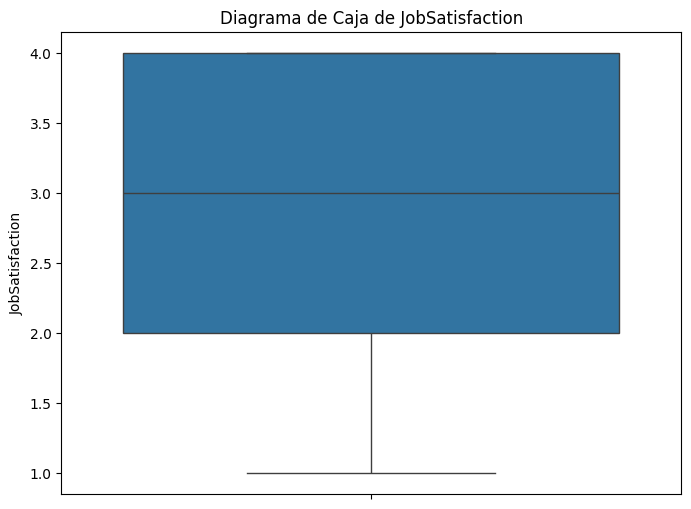

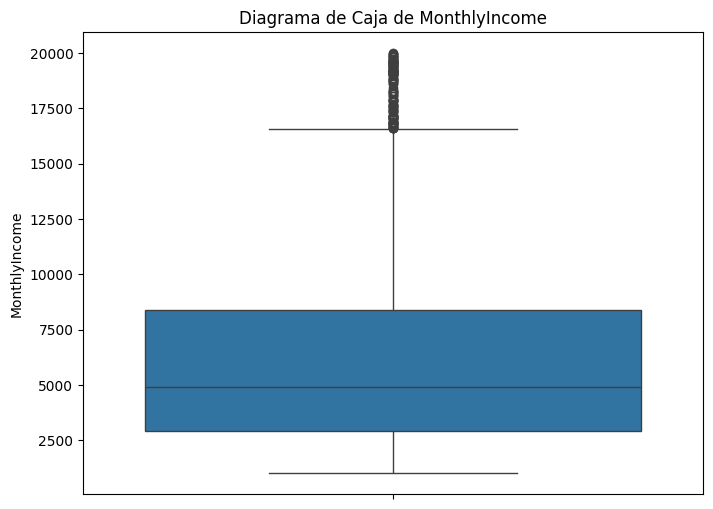

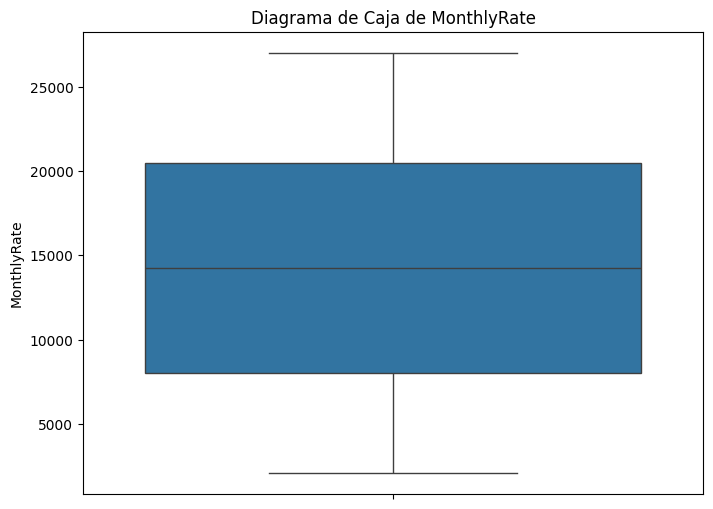

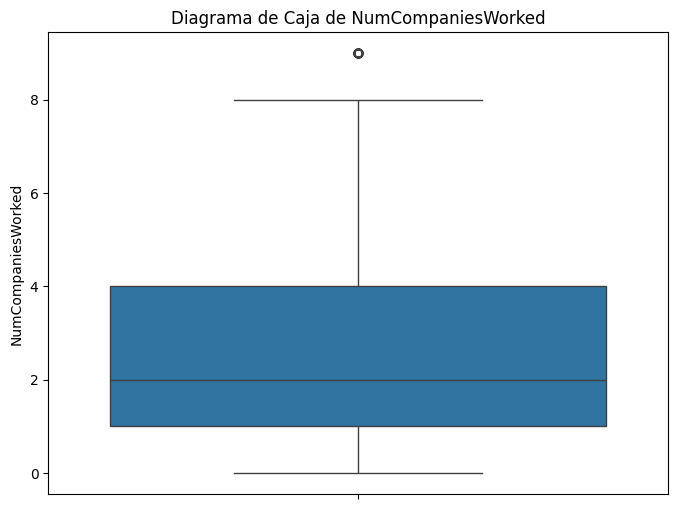

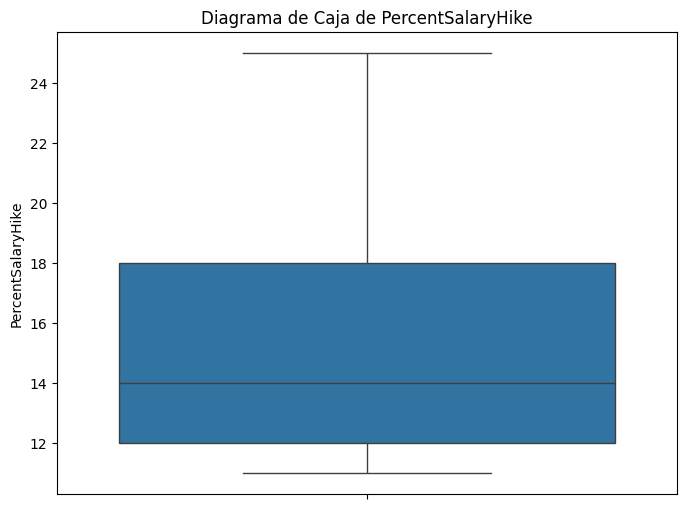

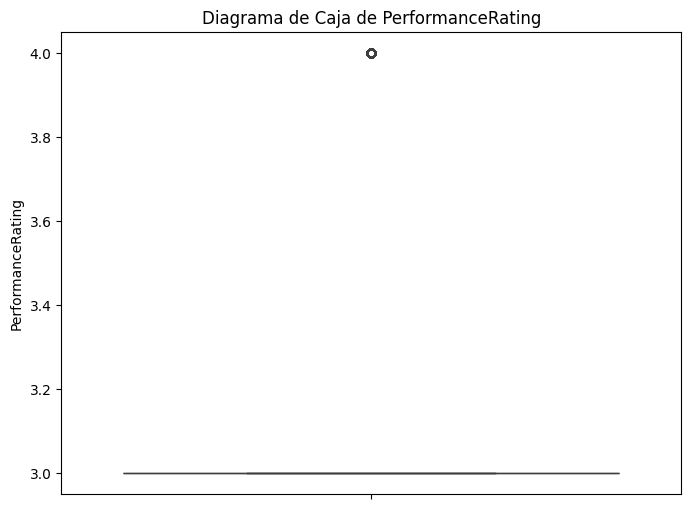

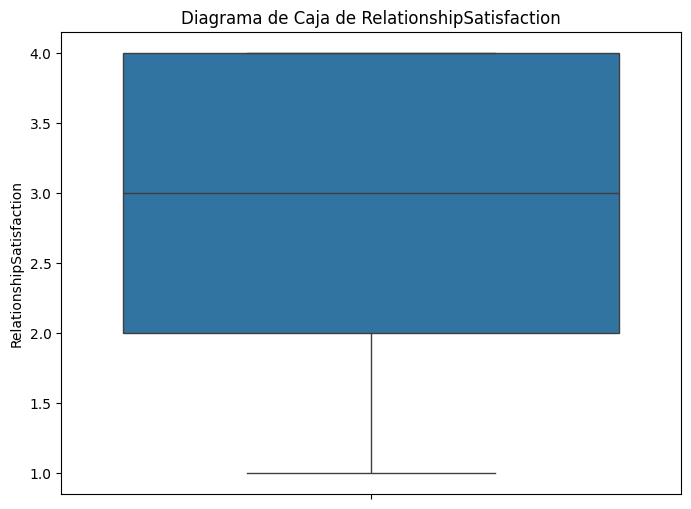

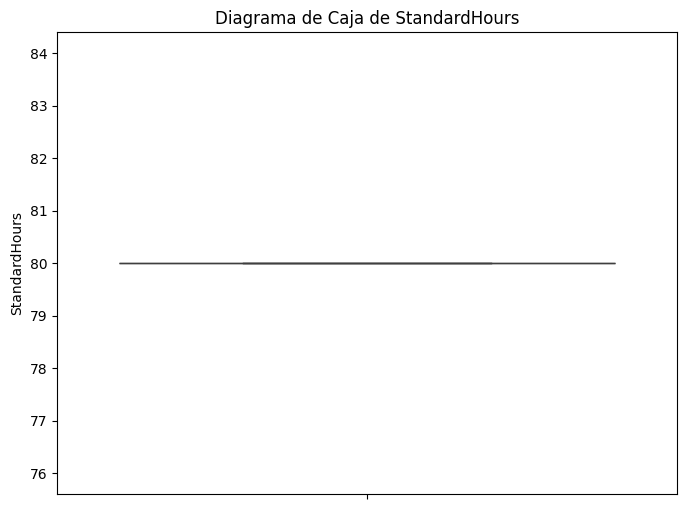

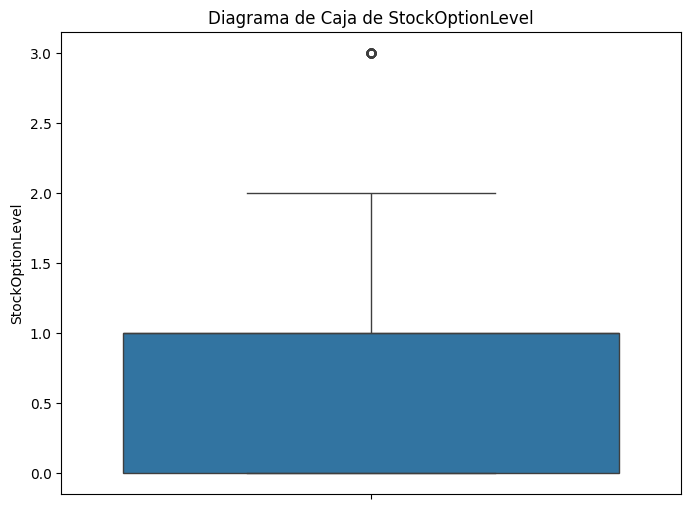

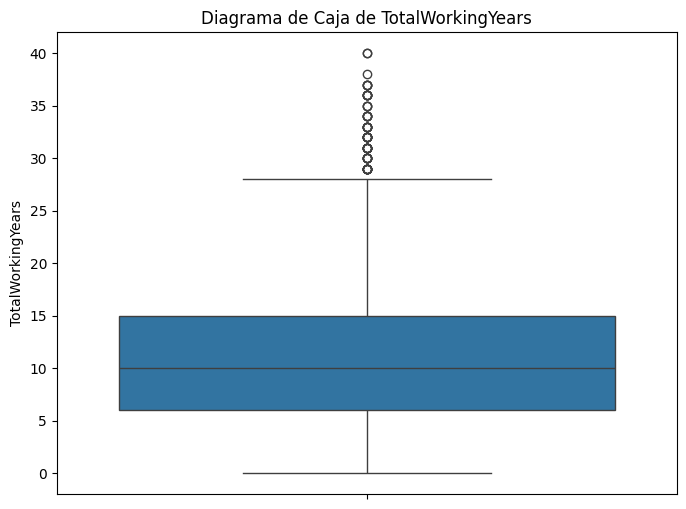

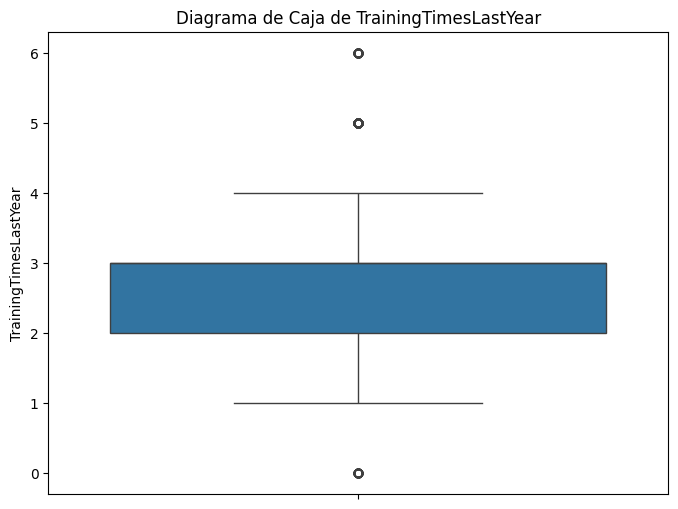

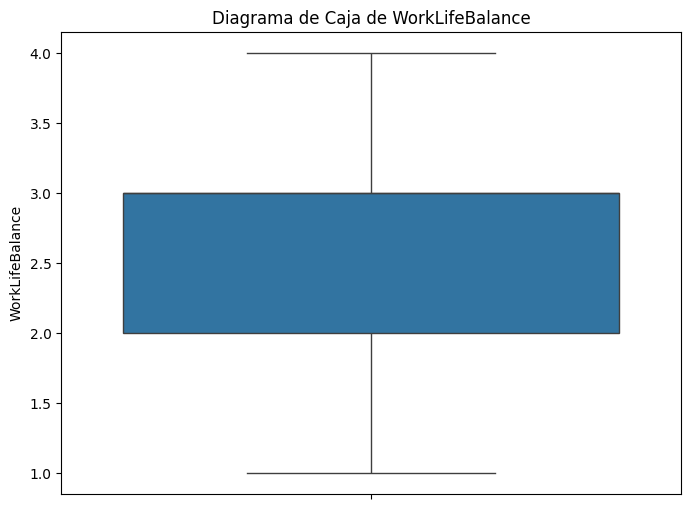

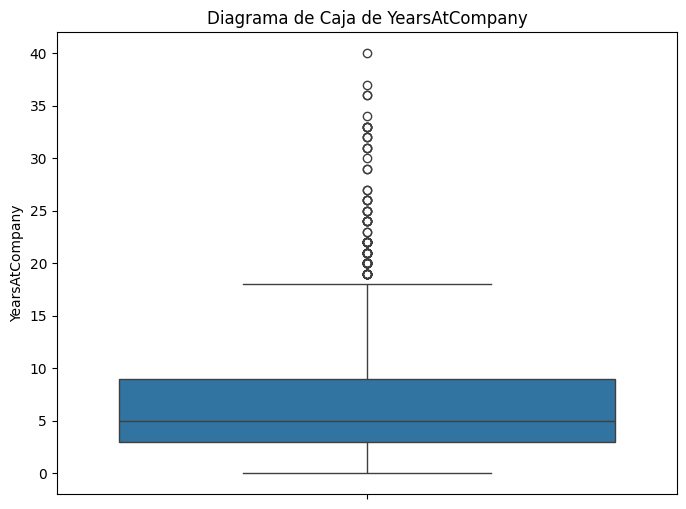

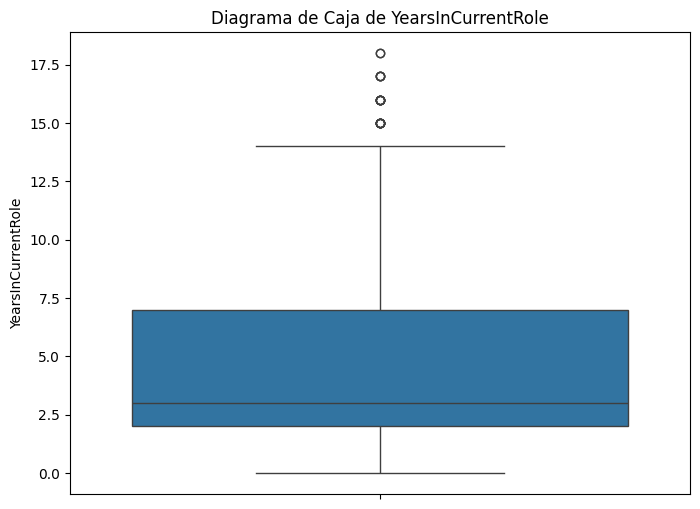

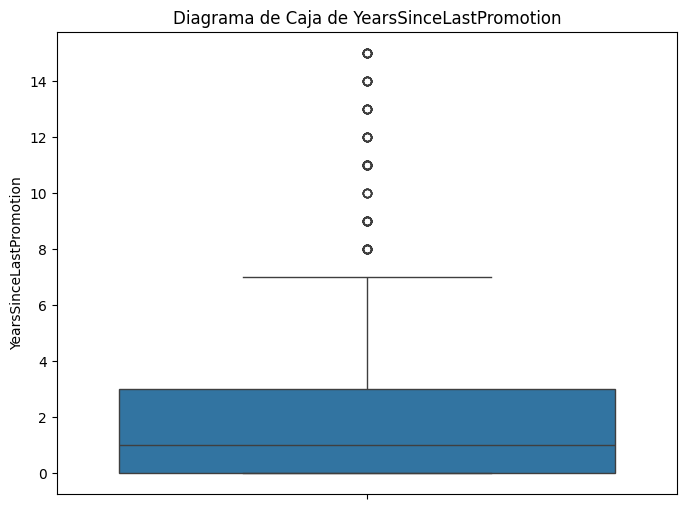

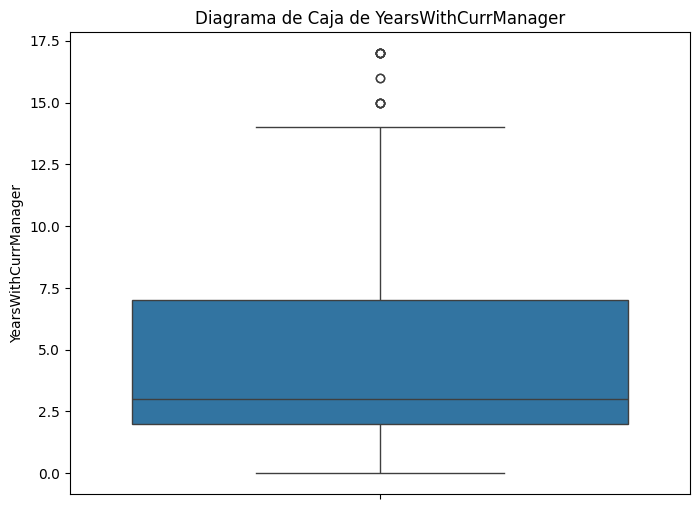

In [18]:
for var in numerical_vars:
# 4. Crear diagrama de caja para identificar valores atípicos
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title(f'Diagrama de Caja de {var}')
    plt.ylabel(var)
    plt.show()
    print("\n")

In [21]:
for var in numerical_vars:
  # 5. Identificar valores atípicos usando el método IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Valores atípicos para {var}:\n", outliers)
    print("-" * 30)  # Separador visual entre variables
    print("\n")

Valores atípicos para Age:
 Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
------------------------------


Valores atípicos para DailyRate:
 Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, N